# Sobre o notebook

Esse espaço será utilizado para a realização das atividades do curso de **IA aplicada a Data Science: utilizando IA na construção de visualização de dados** da Alura. Aqui iremos escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.



Logo abaixo, temos as url's onde estão localizadas as bases utilizadas no projeto juntamente com a url com dados que utilizaremos também no desafio

# Links das bases de dados

In [ ]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"

## Conhecendo os dados

In [ ]:
import pandas as pd

In [ ]:
dados_clientes = pd.read_csv(url_clientes)
dados_vendas = pd.read_csv(url_vendas)
dados_zoop_pay = pd.read_csv(url_zoop_pay)

In [ ]:
dados_clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [ ]:
dados_vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [ ]:
dados_zoop_pay.head()

,ID_cliente,zoop_pay
0,6149,Não
1,9491,Sim
2,5288,Não
3,9679,Sim
4,1380,Não


> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Olá gemini! Vamos atuar como analistas de dados e trabalharemos com as três bases de dados presentes no notebook para realizar nossas análises. Leias as três bases de dados e cria uma única tabela, concatenando-as. O nome da tabela será 'df'. Coloque as colunas em uma ordem de tal modo que fique concisa e facilite a análise.

# Task
Ler os arquivos "dados_clientes.csv", "dados_vendas.csv" e "dados_zoop_pay.csv", concatená-los em uma única tabela chamada 'df' e organizar as colunas de forma concisa para análise.

## Entender as relações entre as tabelas

### Subtask:
Analisar as colunas em comum entre `dados_clientes`, `dados_vendas` e `dados_zoop_pay` para determinar a melhor forma de uni-las (concatenação ou merge).


In [ ]:
dados_clientes.info()
dados_vendas.info()
dados_zoop_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   obj

## Unir as tabelas

### Subtask:
Combinar as três tabelas em uma única tabela chamada `df`.


In [ ]:
df_temp = pd.merge(dados_clientes, dados_vendas, on='ID_compra')
df = pd.merge(df_temp, dados_zoop_pay, on='ID_cliente')

## Organizar as colunas

### Subtask:
Reordenar as colunas da tabela `df` para que fiquem em uma ordem lógica e concisa para análise. Exibir as primeiras linhas da tabela combinada para verificar se a união e a organização foram bem-sucedidas.



In [ ]:
column_order = [
    'ID_compra', 'ID_cliente', 'data', 'horario', 'categoria', 'preco_unitario', 'quantidade', 'frete',
    'metodo_pagamento', 'zoop_pay', 'cidade', 'uf', 'regiao', 'idade', 'sexo_biologico', 'cashback',
    'avaliacao_compra'
]
df = df[column_order]
display(df.head())

,ID_compra,ID_cliente,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,zoop_pay,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,2023-04-23,16:51,Alimentos e bebidas,65.9,1,5.27,Cartão de Crédito,Não,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,2023-11-23,15:48,Alimentos e bebidas,78.9,4,0.00,PIX,Não,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,2023-12-17,21:49,Livros,64.9,5,0.00,Cartão de Débito,Não,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,2023-07-28,19:32,Alimentos e bebidas,79.9,2,0.00,PIX,Sim,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,2023-08-03,16:00,Casa e limpeza,75.9,5,30.36,Cartão de Crédito,Não,Salvador,Bahia,Nordeste,30,Feminino,Não,10


> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Transforme os dados da coluna 'data' para o formato datatime

In [ ]:
df['data'] = pd.to_datetime(df['data'])
display(df.head())

,ID_compra,ID_cliente,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,zoop_pay,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,2023-04-23,16:51,Alimentos e bebidas,65.9,1,5.27,Cartão de Crédito,Não,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,2023-11-23,15:48,Alimentos e bebidas,78.9,4,0.00,PIX,Não,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,2023-12-17,21:49,Livros,64.9,5,0.00,Cartão de Débito,Não,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,2023-07-28,19:32,Alimentos e bebidas,79.9,2,0.00,PIX,Sim,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,2023-08-03,16:00,Casa e limpeza,75.9,5,30.36,Cartão de Crédito,Não,Salvador,Bahia,Nordeste,30,Feminino,Não,10


> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Atuando como analista de dados, leia a nossa base de dados, em seguida, calcule o faturamento por região (faturamento = preco_unitario * quantidade + frete).

## Calcular o faturamento por compra

### Subtask:
Criar uma nova coluna no DataFrame `df` que represente o faturamento total de cada compra, calculando o produto do 'preco_unitario' pela 'quantidade' e somando o valor do 'frete'.


In [ ]:
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']
display(df.head())

,ID_compra,ID_cliente,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,zoop_pay,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra,faturamento
0,904,8972,2023-04-23,16:51,Alimentos e bebidas,65.9,1,5.27,Cartão de Crédito,Não,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9,71.17
1,4613,5120,2023-11-23,15:48,Alimentos e bebidas,78.9,4,0.00,PIX,Não,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9,315.60
2,5579,1847,2023-12-17,21:49,Livros,64.9,5,0.00,Cartão de Débito,Não,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8,324.50
3,2405,2846,2023-07-28,19:32,Alimentos e bebidas,79.9,2,0.00,PIX,Sim,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7,159.80
4,2485,2715,2023-08-03,16:00,Casa e limpeza,75.9,5,30.36,Cartão de Crédito,Não,Salvador,Bahia,Nordeste,30,Feminino,Não,10,409.86


## Visualizando os dados

### Mão na Massa - Gerando visuais em relação a localidade

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos gerar a partir de nossa base de dados um visual que apresente o faturamento das vendas por região. Lembre-se que aqui o faturamento é dado pelo produto do valor unitário pela quantidade comprada somado ao frete.

## Agrupar por região e somar o faturamento

### Subtask:
Agrupar o DataFrame `df` pela coluna 'regiao' e somar o 'faturamento' para obter o faturamento total por região.


In [ ]:
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum()
display(faturamento_por_regiao)

,faturamento
regiao,
Centro-Oeste,1393880.91
Nordeste,5249059.11
Norte,1047876.52
Sudeste,6833258.52
Sul,2454932.45


## Criar o visual do faturamento por região

### Subtask:
Gerar um gráfico (por exemplo, um gráfico de barras) para visualizar o faturamento total de cada região.


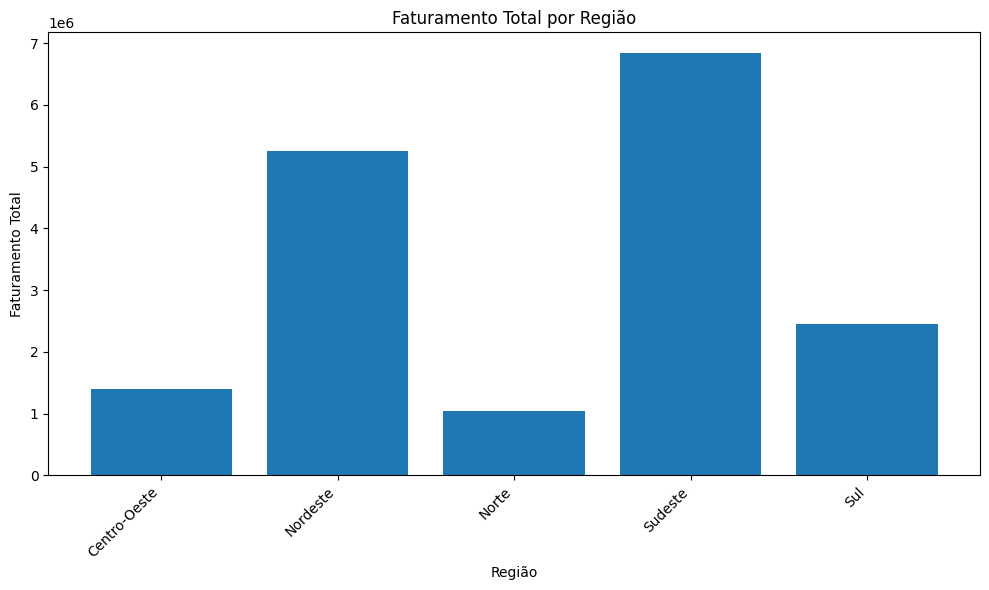

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(faturamento_por_regiao.index, faturamento_por_regiao.values)
plt.xlabel('Região')
plt.ylabel('Faturamento Total')
plt.title('Faturamento Total por Região')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos gerar a partir de nossa base de dados um visual que apresente a composição do público por sexo biológico nos estados de São Paulo e Rio de Janeiro. Agrupe ou empilhe os dados para apresentação.

## Filtrar dados por estado

### Subtask:
Criar um novo DataFrame contendo apenas os dados dos estados de São Paulo e Rio de Janeiro.


In [ ]:
estados_selecionados = ['São Paulo', 'Rio de Janeiro']
df_sudeste = df[df['uf'].isin(estados_selecionados)]
display(df_sudeste.head())

,ID_compra,ID_cliente,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,zoop_pay,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra,faturamento
1,4613,5120,2023-11-23,15:48,Alimentos e bebidas,78.9,4,0.0,PIX,Não,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9,315.6
2,5579,1847,2023-12-17,21:49,Livros,64.9,5,0.0,Cartão de Débito,Não,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8,324.5
3,2405,2846,2023-07-28,19:32,Alimentos e bebidas,79.9,2,0.0,PIX,Sim,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7,159.8
7,2390,4903,2023-07-26,23:11,Alimentos e bebidas,89.9,2,0.0,Cartão de Débito,Não,São Paulo,São Paulo,Sudeste,26,Masculino,Não,9,179.8
11,5890,6238,2023-12-24,20:09,Alimentos e bebidas,35.9,1,0.0,Cartão de Crédito,Sim,São Paulo,São Paulo,Sudeste,31,Masculino,Sim,10,35.9


## Agrupar por estado e sexo biológico

### Subtask:
Agrupar o DataFrame filtrado pelas colunas 'uf' e 'sexo_biologico' e contar o número de clientes em cada grupo.


In [ ]:
contagem_clientes_por_estado_sexo = df_sudeste.groupby(['uf', 'sexo_biologico']).size().reset_index(name='contagem_clientes')
display(contagem_clientes_por_estado_sexo)

,uf,sexo_biologico,contagem_clientes
0,Rio de Janeiro,Feminino,303
1,Rio de Janeiro,Masculino,267
2,São Paulo,Feminino,838
3,São Paulo,Masculino,662


## Criar o visual da composição por sexo biológico

### Subtask:
Gerar um gráfico (por exemplo, um gráfico de barras agrupado ou empilhado) para visualizar a composição do público por sexo biológico nos estados selecionados.


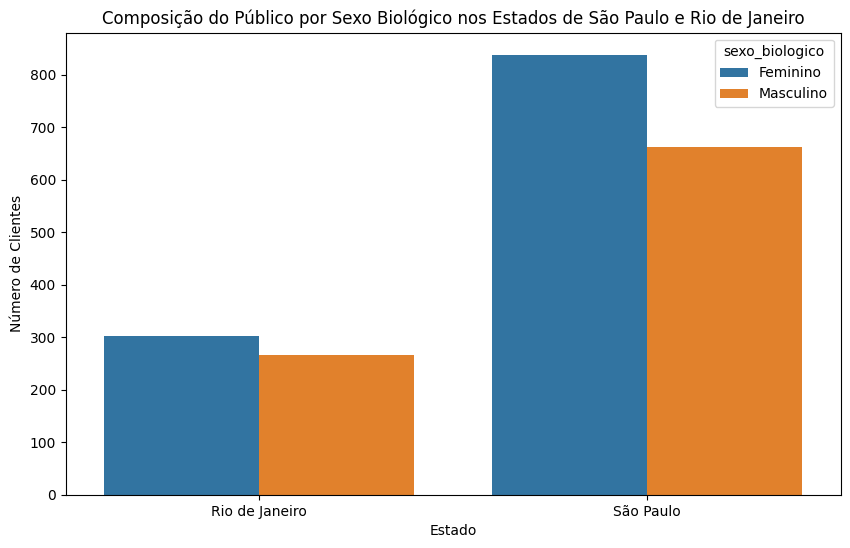

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=contagem_clientes_por_estado_sexo, x='uf', y='contagem_clientes', hue='sexo_biologico')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.title('Composição do Público por Sexo Biológico nos Estados de São Paulo e Rio de Janeiro')
plt.show()

## Gerando mais visuais

### Mão na Massa - Perfil dos clientes

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos gerar a partir de nossa base de dados um visual que apresente a proporção de pessoas pré-cadastradas na Zoop Pay. Nosso objetivo é saber, qual a porcentagem de pessoas que já possuem pré-cadastro para este produto.

## Contar a ocorrência de pré-cadastro na zoop pay

### Subtask:
Contar o número de ocorrências para cada valor único na coluna 'zoop_pay' para determinar quantas pessoas possuem e quantas não possuem o pré-cadastro.


In [ ]:
contagem_zoop_pay = df['zoop_pay'].value_counts()
display(contagem_zoop_pay)

,count
zoop_pay,
Não,4774
Sim,1395


## Calcular a proporção

### Subtask:
Calcular a proporção de pessoas com e sem pré-cadastro na Zoop Pay.


In [ ]:
proporcao_zoop_pay = contagem_zoop_pay / contagem_zoop_pay.sum()
display(proporcao_zoop_pay)

,count
zoop_pay,
Não,0.773869
Sim,0.226131


## Criar o visual da proporção de pré-cadastro

### Subtask:
Gerar um gráfico (por exemplo, um gráfico de pizza ou de barras) para visualizar a proporção de pessoas pré-cadastradas na Zoop Pay.


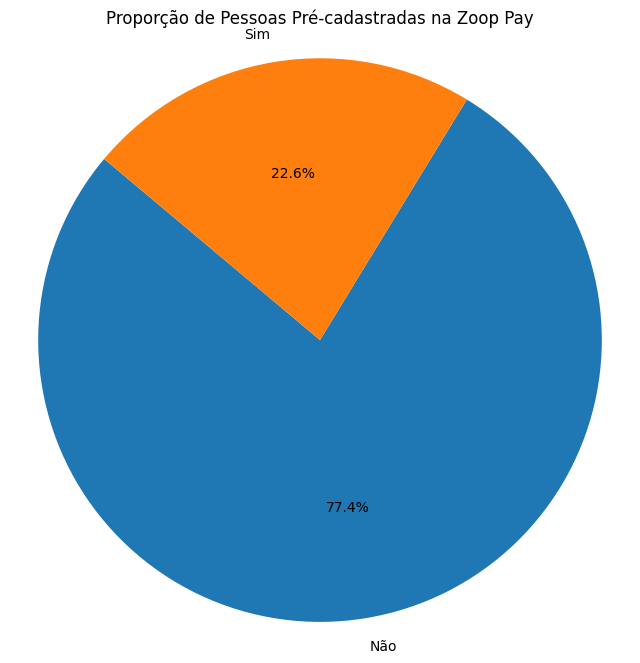

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(proporcao_zoop_pay, labels=proporcao_zoop_pay.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Pessoas Pré-cadastradas na Zoop Pay')
plt.axis('equal')
plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos gerar a partir de nossa base de dados um visual que apresente a distribuição das idades dos clientes por região. Nosso objetivo é analisar a distribuição das idades dos clientes por região a fim de traçar uma persona (perfil) de sua clientela em diferentes localidades do país.

## Agrupar dados por região

### Subtask:
Agrupar o DataFrame `df` pela coluna 'regiao'.


In [ ]:
idade_por_regiao = df.groupby('regiao')['idade']

## Visualizar a distribuição das idades por região

### Subtask:
Gerar um visual (por exemplo, box plots ou histogramas) que apresente a distribuição das idades dos clientes para cada região.


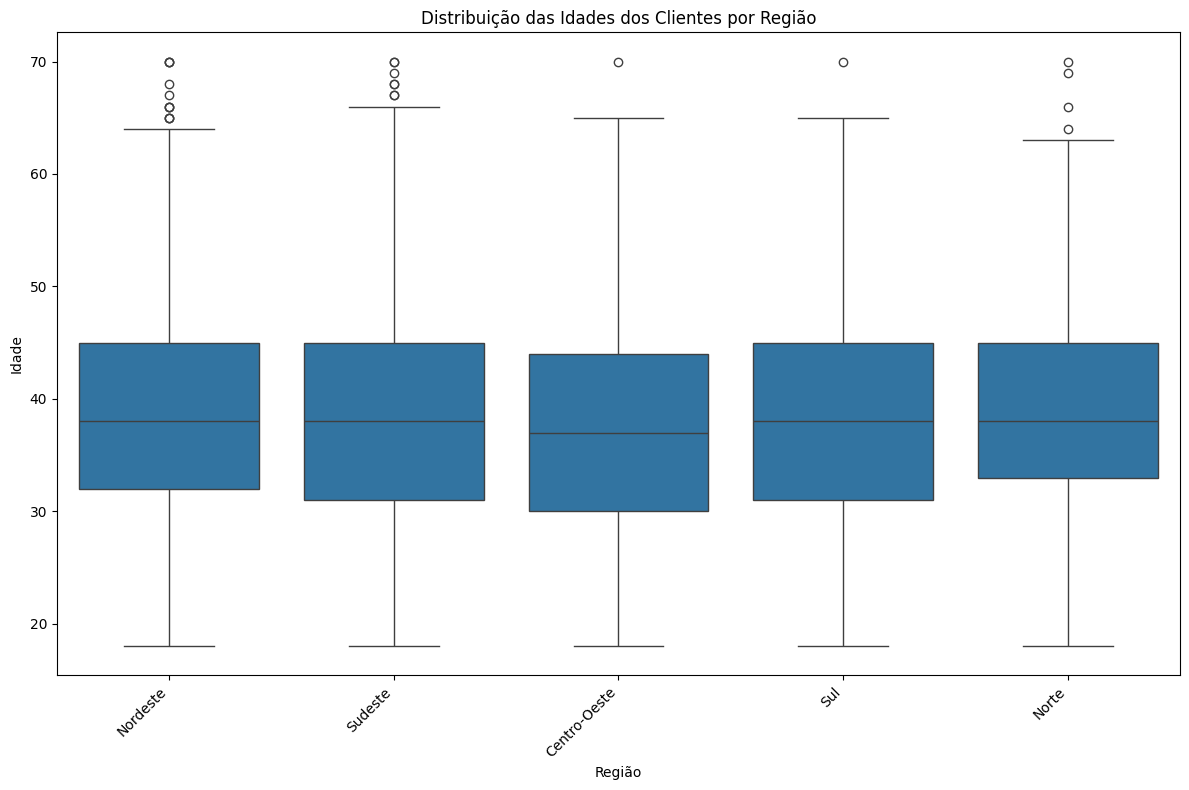

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='regiao', y='idade', data=df)
plt.xlabel('Região')
plt.ylabel('Idade')
plt.title('Distribuição das Idades dos Clientes por Região')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Técnicas de storytelling

### Paleta de Cores

In [ ]:
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

### Mão na Massa - Refinando os visuais escolhidos

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Nós vamos agora realizar um refinamento nos gráficos gerados anteriormente iniciando pelo visual que apresenta o faturamento das vendas por região. As instruções para refinamento são as seguintes:
- Plano de fundo da figura e da área do plot na cor CINZA_1
- Cor das colunas em AQUA_1 (caso queira destacar apenas uma, pode recorrer ao AQUA_3, por exemplo
- Tamanho da figura de (10,6) - Altere o título da figura e seu tamanho para 18 e cor CINZA_5, ajuste os labels e rótulos do eixo x e y quando existirem para tamanho 12 e cor AZUL_1
- Retire o máximo das bordas possível e ajuste os dados para serem apresentados nas barras na ordem de milhões na cor AZUL_1 e tamanho 12.

 Todas as variáveis que representam as cores nas instruções já estão em uma célula do nosso notebook.

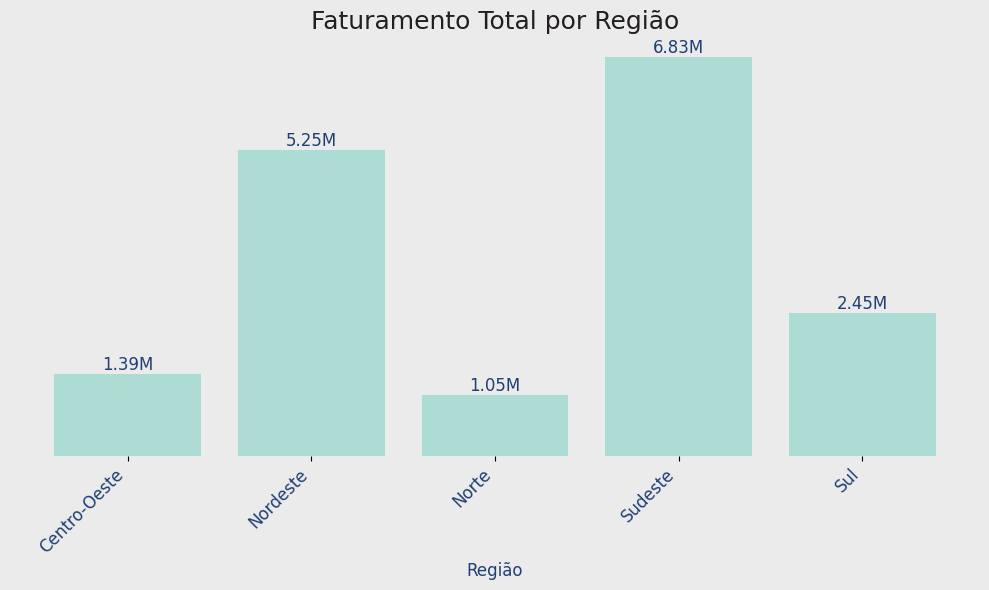

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor=CINZA_1)
ax.set_facecolor(CINZA_1)

  # Criar o gráfico de barras
bars = ax.bar(faturamento_por_regiao.index, faturamento_por_regiao.values, color=AQUA_1)

  # Título e rótulos dos eixos
plt.title('Faturamento Total por Região', fontsize=18, color=CINZA_5)
plt.xlabel('Região', fontsize=12, color=AZUL_1)
plt.ylabel('Faturamento Total (Milhões)', fontsize=12, color=AZUL_1)

  # Ajustar rótulos do eixo x
plt.xticks(rotation=45, ha='right', fontsize=12, color=AZUL_1)
  # plt.yticks(fontsize=12, color=AZUL_1) # Remover yticks
ax.yaxis.set_visible(False) # Remover o eixo y completamente

  # Remover bordas
for spine in ax.spines.values():
    spine.set_visible(False)

  # Adicionar rótulos de dados nas barras em milhões
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1000000:.2f}M', va='bottom', ha='center', fontsize=12, color=AZUL_1) # Formatando em milhões

plt.tight_layout()

  # Salvar o gráfico
plt.savefig('faturamento_por_regiao.png', bbox_inches='tight', facecolor=fig.get_facecolor())

plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos refinar o visual que apresenta a proporção de pessoas pré-cadastradas na Zoop Pay. As instruções para refinamento são as seguintes:
- Plano de fundo da figura e da área do plot na cor CINZA_1
- Cor das fatias de AZUL_1 para “Sim” e CINZA_3 para “Não” -Tamanho da figura de (6,6)
- Altere o título da figura e seu tamanho para 18 e cor CINZA_5
- Adicione os rótulos nas fatias com tamanho 12 e as porcentagem também em tamanho 12 e em negrito. As porcentagens devem estar na cor BRANCO e os rótulos das fatias na mesma cor das fatias
- Ajuste a rosca para que sua largura seja de 0.4 e as porcentagens das fatias na posição 0.8 em relação ao centro
- Evite explosões de fatias e efeitos que dificultam a análise do gráfico

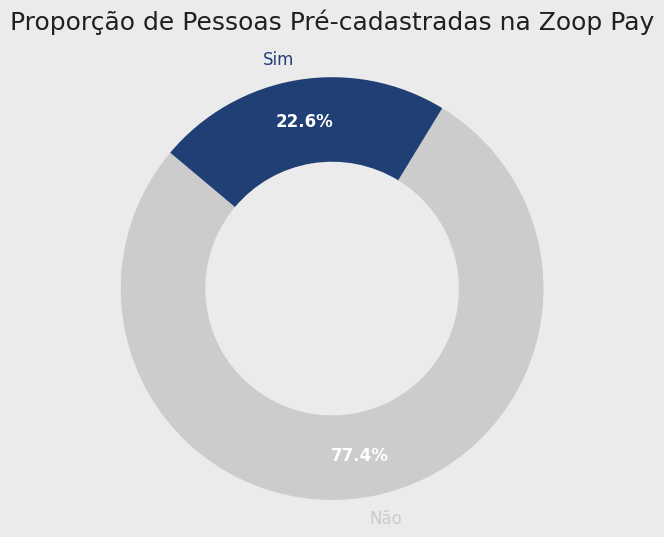

In [ ]:
# Criar a figura e eixos
fig, ax = plt.subplots(figsize=(6, 6))

# Cor de fundo da figura e área do plot
fig.patch.set_facecolor(CINZA_1)
ax.set_facecolor(CINZA_1)

# Definir as cores para as fatias
colors = [AZUL_1 if label == 'Sim' else CINZA_3 for label in proporcao_zoop_pay.index]

# Criar o gráfico de rosca
wedgeprops = {'width': 0.4}
wedges, texts, autotexts = ax.pie(proporcao_zoop_pay,
                                  labels=proporcao_zoop_pay.index,
                                  autopct='%1.1f%%',
                                  startangle=140,
                                  colors=colors,
                                  wedgeprops=wedgeprops,
                                  pctdistance=0.8) # Posição das porcentagens

# Título da figura
ax.set_title('Proporção de Pessoas Pré-cadastradas na Zoop Pay', fontsize=18, color=CINZA_5, pad=20) # Adicionado pad para aumentar a distância

# Ajustar rótulos (nomes das fatias)
for text, color in zip(texts, colors):
    text.set_fontsize(12)
    text.set_color(color)

# Ajustar porcentagens
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_weight('bold')
    autotext.set_color(BRANCO)

# Garantir que o gráfico seja circular
ax.axis('equal')

# Salvar o gráfico
plt.savefig('proporcao_zoop_pay.png', bbox_inches='tight', facecolor=fig.get_facecolor())

plt.show()

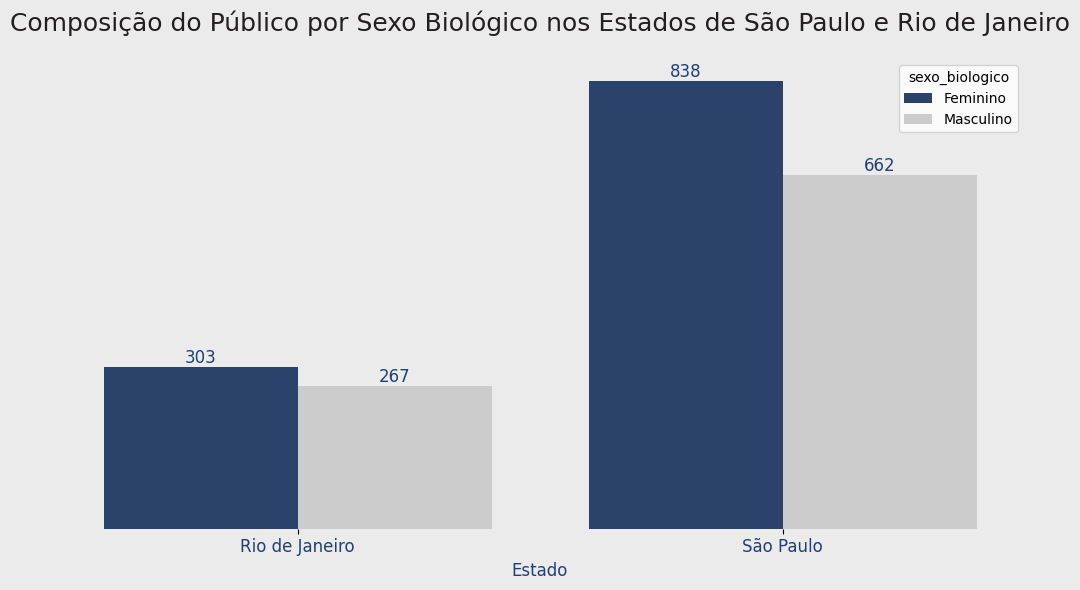

In [ ]:
import seaborn as sns

# Criar a figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Cor de fundo da figura e área do plot
fig.patch.set_facecolor(CINZA_1)
ax.set_facecolor(CINZA_1)

# Criar o gráfico de barras agrupadas
bars = sns.barplot(data=contagem_clientes_por_estado_sexo, x='uf', y='contagem_clientes', hue='sexo_biologico', ax=ax, palette=[AZUL_1, CINZA_3])

# Título e rótulos dos eixos
ax.set_title('Composição do Público por Sexo Biológico nos Estados de São Paulo e Rio de Janeiro', fontsize=18, color=CINZA_5, pad=20)
ax.set_xlabel('Estado', fontsize=12, color=AZUL_1)
ax.set_ylabel('Número de Clientes', fontsize=12, color=AZUL_1)

# Ajustar rótulos do eixo x
plt.xticks(fontsize=12, color=AZUL_1)
# plt.yticks(fontsize=12, color=AZUL_1) # Remover yticks
ax.yaxis.set_visible(False) # Remover o eixo y completamente

# Remover bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# Adicionar rótulos de dados nas barras
for container in ax.containers:
    ax.bar_label(container, fontsize=12, color=AZUL_1)


plt.tight_layout()

# Salvar o gráfico
plt.savefig('composicao_sexo_biologico.png', bbox_inches='tight', facecolor=fig.get_facecolor())

plt.show()

/tmp/ipython-input-86-4094926579.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='regiao', y='idade', data=df, ax=ax, palette=[AQUA_1] * len(df['regiao'].unique())) # Usando AQUA_1 para as caixas


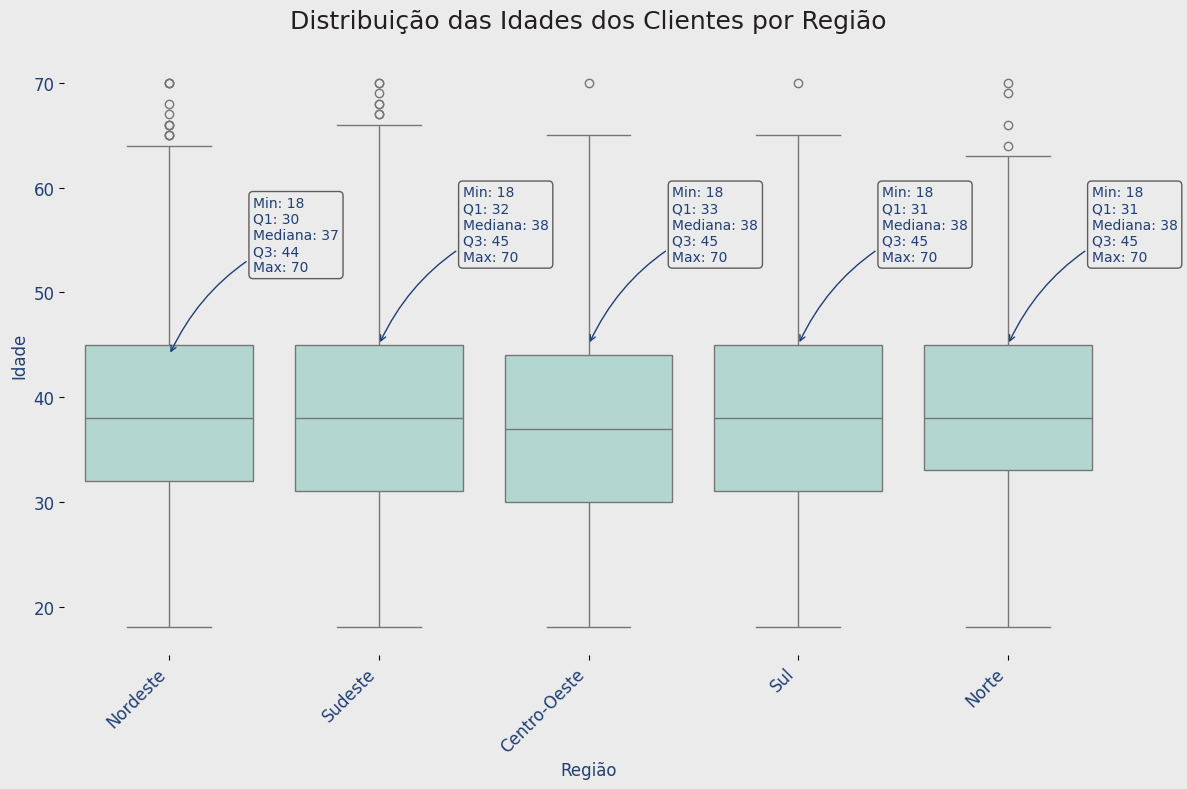

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Criar a figura e eixos
fig, ax = plt.subplots(figsize=(12, 8))

# Cor de fundo da figura e área do plot
fig.patch.set_facecolor(CINZA_1)
ax.set_facecolor(CINZA_1)

# Criar o gráfico box plot
sns.boxplot(x='regiao', y='idade', data=df, ax=ax, palette=[AQUA_1] * len(df['regiao'].unique())) # Usando AQUA_1 para as caixas

# Título e rótulos dos eixos
ax.set_title('Distribuição das Idades dos Clientes por Região', fontsize=18, color=CINZA_5, pad=20)
ax.set_xlabel('Região', fontsize=12, color=AZUL_1)
ax.set_ylabel('Idade', fontsize=12, color=AZUL_1)

# Ajustar rótulos do eixo x e y
plt.xticks(rotation=45, ha='right', fontsize=12, color=AZUL_1)
plt.yticks(fontsize=12, color=AZUL_1)

# Remover bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# Calcular quartis para as anotações
quartiles_info = df.groupby('regiao')['idade'].quantile([0, 0.25, 0.5, 0.75, 1]).unstack()

# Adicionar anotações com informações de quartis para cada região
for i, region in enumerate(quartiles_info.index):
    min_val = quartiles_info.loc[region, 0]
    q1_val = quartiles_info.loc[region, 0.25]
    mediana_val = quartiles_info.loc[region, 0.5]
    q3_val = quartiles_info.loc[region, 0.75]
    max_val = quartiles_info.loc[region, 1]

    annotation_text = f"Min: {min_val:.0f}\nQ1: {q1_val:.0f}\nMediana: {mediana_val:.0f}\nQ3: {q3_val:.0f}\nMax: {max_val:.0f}"

    # Posição da anotação e da seta
    # Ajuste as coordenadas xy e xytext conforme necessário para posicionar as caixas
    # e as setas de forma adequada para cada região
    ax.annotate(annotation_text, xy=(i, q3_val), xytext=(i + 0.4, mediana_val + 15), # Apontando para o Q3 (borda superior da caixa)
                fontsize=10, color=AZUL_1,
                bbox=dict(boxstyle="round,pad=0.3", fc=CINZA_1, ec=CINZA_5, alpha=0.7),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color=AZUL_1))


plt.tight_layout() # Ajusta layout para acomodar as anotações

# Salvar o gráfico
plt.savefig('distribuicao_idade_por_regiao_refinado.png', bbox_inches='tight', facecolor=fig.get_facecolor())

plt.show()